# Sales Analysis Practice

In [1]:
# Import Libraries
import pandas as pd
import os
import datetime

## Read in and consolidate data

In [2]:
# Merge 12 months of sales data into a single file
df = pd.read_csv('Sales_data/Sales_April_2019.csv')

# Create a list
path = "./Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

files

['Sales_December_2019.csv',
 'Sales_April_2019.csv',
 'Sales_February_2019.csv',
 'Sales_March_2019.csv',
 'Sales_August_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_January_2019.csv',
 'Sales_September_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv']

In [3]:
# Create an empty dataframe
all_months_data = pd.DataFrame()

# Print every item in that list
for file in files:
    df = pd.read_csv('Sales_data/'+file)
    all_months_data = pd.concat([all_months_data, df])
    
#all_months_data.to_csv('Sales_data/all_data.csv', index = False)

df = all_months_data

In [4]:
len(df)

186850

In [5]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


## Clean

**Drop NaN rows**

In [6]:
# Drop NaN rows
nan_df = df[df.isna().any(axis = 1)]

In [7]:
nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
264,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
12567,NaN,NaN,NaN,NaN,NaN,NaN
12640,NaN,NaN,NaN,NaN,NaN,NaN
12659,NaN,NaN,NaN,NaN,NaN,NaN
12732,NaN,NaN,NaN,NaN,NaN,NaN


**Drop erroneous records**

In [8]:
# Drop erroneous records
df = df[df['Quantity Ordered'] != 'Quantity Ordered'].copy()

In [9]:
df = df.dropna(how='all')
df = df.copy()

**Convert order date to datetime**

In [10]:
# Convert to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format = '%m/%d/%y %H:%M', errors = 'coerce')

# Check that datetime worked
print(type(df['Order Date'][0]))
print(df.info())

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 13621
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  object        
 3   Price Each        185950 non-null  object        
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 14.9+ MB
None


In [11]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301"


**Change the data type of the price and quantity columns from strings to numerals**

In [12]:
# Change the data type of the price and quantity columns from strings to numerals
df = df.astype({'Quantity Ordered':'float','Price Each':'float'}, errors = 'raise')
df.dtypes

Order ID                    object
Product                     object
Quantity Ordered           float64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

In [13]:
len(df)

185950

**Add a city column**

In [14]:
df['Purchase City'] = df['Purchase Address'].str.extract(r'.+,(.+,...)+')

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Purchase City
0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001","New York City, NY"
1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001","New York City, NY"
2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001","New York City, NY"
3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016","San Francisco, CA"
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301","Atlanta, GA"


## Analysis

**1. What was the best month of sales and how much was earned that month?**

In [15]:
# Add a month column
df['month'] = df['Order Date'].dt.month
df['month'] = df['month'].astype('int32')

# Add a year column
df['year'] = df['Order Date'].dt.year
df['year'] = df['year'].astype('int32')

In [16]:
df['month'].value_counts()

12    24984
10    20282
4     18279
11    17573
5     16566
3     15153
7     14293
6     13554
2     11975
8     11961
9     11621
1      9709
Name: month, dtype: int64

In [17]:
df['year'].value_counts()

2019    185916
2020        34
Name: year, dtype: int64

In [18]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Purchase City,month,year
0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001","New York City, NY",12,2019
1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001","New York City, NY",12,2019
2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001","New York City, NY",12,2019
3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016","San Francisco, CA",12,2019
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301","Atlanta, GA",12,2019


In [19]:
# Add an order total column

df['Sales'] = df['Quantity Ordered'] * df['Price Each']

In [20]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Purchase City,month,year,Sales
0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001","New York City, NY",12,2019,1700.00
1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001","New York City, NY",12,2019,600.00
2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001","New York City, NY",12,2019,11.95
3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016","San Francisco, CA",12,2019,149.99
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301","Atlanta, GA",12,2019,11.95


In [21]:
df.groupby(by = ['year','month']).sum().sort_values('Sales', ascending = False)

Quantity Ordered    Price Each         Sales
year month                                              
2019 12              28114.0  4.588415e+06  4.613443e+06
     10              22703.0  3.715555e+06  3.736727e+06
     4               20558.0  3.367671e+06  3.390670e+06
     11              19798.0  3.180601e+06  3.199603e+06
     5               18667.0  3.135125e+06  3.152607e+06
     3               17005.0  2.791208e+06  2.807100e+06
     7               16072.0  2.632540e+06  2.647776e+06
     6               15253.0  2.562026e+06  2.577802e+06
     8               13448.0  2.230345e+06  2.244468e+06
     2               13449.0  2.188885e+06  2.202022e+06
     9               13109.0  2.084992e+06  2.097560e+06
     1               10862.0  1.803265e+06  1.813586e+06
2020 1                  41.0  8.503400e+03  8.670290e+03

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
months = range(1,13)

sales = df.groupby('month').sum()

sales

,Quantity Ordered,Price Each,year,Sales
month,,,,
1,10903.0,1.811768e+06,19602505,1.822257e+06
2,13449.0,2.188885e+06,24177525,2.202022e+06
3,17005.0,2.791208e+06,30593907,2.807100e+06
4,20558.0,3.367671e+06,36905301,3.390670e+06
5,18667.0,3.135125e+06,33446754,3.152607e+06
6,15253.0,2.562026e+06,27365526,2.577802e+06
7,16072.0,2.632540e+06,28857567,2.647776e+06
8,13448.0,2.230345e+06,24149259,2.244468e+06
9,13109.0,2.084992e+06,23462799,2.097560e+06


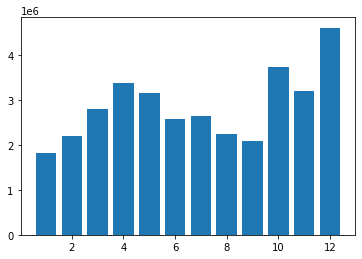

In [24]:
plt.bar(months,sales['Sales']);

**2. What U.S. city had the highest number of sales?**

In [25]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Purchase City,month,year,Sales
0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001","New York City, NY",12,2019,1700.00
1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001","New York City, NY",12,2019,600.00
2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001","New York City, NY",12,2019,11.95
3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016","San Francisco, CA",12,2019,149.99
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301","Atlanta, GA",12,2019,11.95


In [26]:
df.groupby('Purchase City').sum('Sales').sort_values('Sales')

,Quantity Ordered,Price Each,month,year,Sales
Purchase City,,,,,
"Portland, ME",2750.0,4.471893e+05,17144,4956645,4.497583e+05
"Austin, TX",11153.0,1.809874e+06,69829,19998197,1.819582e+06
"Portland, OR",11303.0,1.860558e+06,70621,20210192,1.870732e+06
"Seattle, WA",16553.0,2.733296e+06,104941,29743909,2.747755e+06
"Dallas, TX",16730.0,2.752628e+06,104620,29921582,2.767975e+06
"Atlanta, GA",16602.0,2.779908e+06,104794,30044739,2.795499e+06
"Boston, MA",22528.0,3.637410e+06,141112,40246750,3.661642e+06
"New York City, NY",27932.0,4.635371e+06,175741,50224654,4.664317e+06
"Los Angeles, CA",33289.0,5.421435e+06,208325,59772496,5.452571e+06


''

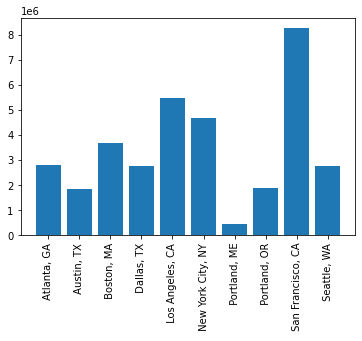

In [27]:
cities = df['Purchase City'].unique()

sales = df.groupby('Purchase City').sum()

plt.bar(sales.index,sales['Sales'])
plt.xticks(rotation = 90)
;

**3. When should we display advertisements to maximize sales?**

In [28]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Purchase City,month,year,Sales
0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001","New York City, NY",12,2019,1700.00
1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001","New York City, NY",12,2019,600.00
2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001","New York City, NY",12,2019,11.95
3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016","San Francisco, CA",12,2019,149.99
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301","Atlanta, GA",12,2019,11.95


In [29]:
df['hour'] = df['Order Date'].dt.hour
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Purchase City,month,year,Sales,hour
0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001","New York City, NY",12,2019,1700.00,0
1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001","New York City, NY",12,2019,600.00,7
2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001","New York City, NY",12,2019,11.95,18
3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016","San Francisco, CA",12,2019,149.99,15
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301","Atlanta, GA",12,2019,11.95,12


''

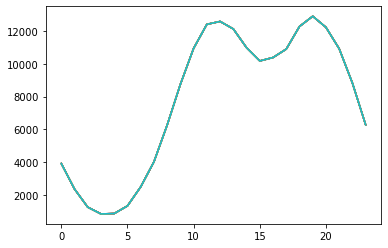

In [30]:
orders = df.groupby('hour').count()

plt.plot(orders.index, orders)
#plt.xticks(orders.index,rotation = 90)
;

**4. What products are most often sold together?**

In [31]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Purchase City,month,year,Sales,hour
0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001","New York City, NY",12,2019,1700.00,0
1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001","New York City, NY",12,2019,600.00,7
2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001","New York City, NY",12,2019,11.95,18
3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016","San Francisco, CA",12,2019,149.99,15
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301","Atlanta, GA",12,2019,11.95,12


In [32]:
df_grouped = df[df['Order ID'].duplicated(keep = False)]
df_grouped.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Purchase City,month,year,Sales,hour
16,295681,Google Phone,1.0,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215","Boston, MA",12,2019,600.00,12
17,295681,USB-C Charging Cable,1.0,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215","Boston, MA",12,2019,11.95,12
18,295681,Bose SoundSport Headphones,1.0,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215","Boston, MA",12,2019,99.99,12
19,295681,Wired Headphones,1.0,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215","Boston, MA",12,2019,11.99,12
36,295698,Vareebadd Phone,1.0,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001","New York City, NY",12,2019,400.00,14


In [33]:
df_grouped['grouped'] = df_grouped.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
df_grouped = df_grouped[['Order ID','grouped']].drop_duplicates()
#df_grouped = df_grouped.copy()
df_grouped.head()

<ipython-input-33-9f963f97e685>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grouped['grouped'] = df_grouped.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


,Order ID,grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"


In [34]:
from itertools import combinations
from collections import Counter

In [35]:
count = Counter()

for row in df_grouped['grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [36]:
count = Counter()

for row in df_grouped['grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,3)))
    
for key, value in count.most_common(10):
    print(key, value)

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5


**5. What product sold the most and why?**

In [37]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Purchase City,month,year,Sales,hour
0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001","New York City, NY",12,2019,1700.00,0
1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001","New York City, NY",12,2019,600.00,7
2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001","New York City, NY",12,2019,11.95,18
3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016","San Francisco, CA",12,2019,149.99,15
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301","Atlanta, GA",12,2019,11.95,12


In [38]:
df.groupby('Product').sum().sort_values('Quantity Ordered')

,Quantity Ordered,Price Each,month,year,Sales,hour
Product,,,,,,
LG Dryer,646.0,387600.00,4383,1304274,387600.00,9326
LG Washing Machine,666.0,399600.00,4523,1344654,399600.00,9785
Vareebadd Phone,2068.0,826000.00,14309,4169236,827200.00,29472
20in Monitor,4129.0,451068.99,29336,8279921,454148.71,58764
ThinkPad Laptop,4130.0,4127958.72,28950,8334434,4129958.70,59746
Macbook Pro Laptop,4728.0,8030800.00,33548,9537757,8037600.00,68261
Flatscreen TV,4819.0,1440000.00,34224,9691201,1445700.00,68815
Google Phone,5532.0,3315000.00,38305,11154976,3319200.00,79479
34in Ultrawide Monitor,6199.0,2348718.19,43304,12479439,2355558.01,89076


<ipython-input-39-f99a687da378>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
<ipython-input-39-f99a687da378>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


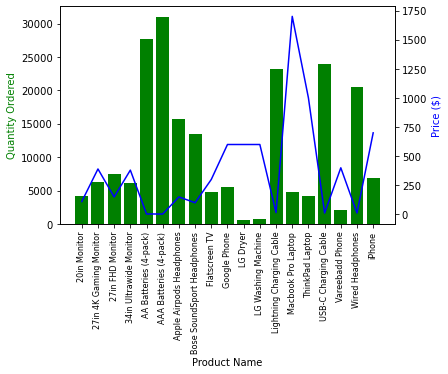

In [39]:
product_group = df.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
prices = df.groupby('Product').mean()['Price Each']
keys = [pair for pair, df in product_group]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()